In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'font/SimHei.ttf')  
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
col_names = ['地点', '出生人数', '男', '女'] + [i for i in range(36)]

df_gaokao_2018 = pd.read_csv('gaokao_2018.txt', 
                             sep=' ', 
                             skiprows=[0]).fillna(0)

df_population = pd.read_csv('population_cn_2000.txt', 
                            sep='\t', 
                            header=None, 
                            names=col_names,
                            usecols=['地点', '出生人数', '男', '女']).dropna()

df_gaokao = pd.merge(df_gaokao_2018, df_population, on='地点')

df_gaokao['男女人数差'] = df_gaokao['男'] - df_gaokao['女']
df_gaokao['男女人数比'] = df_gaokao['男'] / df_gaokao['女']
df_gaokao['光棍占比'] = df_gaokao['男女人数差'] / df_gaokao['男']
df_gaokao['未高考人数'] = df_gaokao['出生人数'] - df_gaokao['报名人数']
df_gaokao['未高考人口比'] = df_gaokao['未高考人数'] / df_gaokao['出生人数']
df_gaokao['一本人口比'] = df_gaokao['一本上线人数'] / df_gaokao['出生人数']

In [3]:
df_gaokao = df_gaokao.drop(df_gaokao.index[0])  # 去掉全国数据
df_gaokao.head()

,地点,缩写,报名人数,一本上线人数,出生人数,男,女,男女人数差,男女人数比,光棍占比,未高考人数,未高考人口比,一本人口比
1,北京,BJ,63073,21500.0,81605.0,42849.0,38756.0,4093.0,1.105609,0.095521,18532.0,0.227094,0.263464
2,天津,TJ,55074,18500.0,71069.0,37627.0,33442.0,4185.0,1.125142,0.111223,15995.0,0.225063,0.260310
3,河北,HeBei,486400,98800.0,761766.0,404849.0,356917.0,47932.0,1.134295,0.118395,275366.0,0.361484,0.129699
4,山西,Shanxi,305071,37200.0,433817.0,229684.0,204133.0,25551.0,1.125168,0.111244,128746.0,0.296775,0.085750
5,吉林,JL,150329,19900.0,232008.0,122173.0,109835.0,12338.0,1.112332,0.100988,81679.0,0.352053,0.085773


In [19]:
for item in df_gaokao['一本人口比'].values:
    print(item,",", end='')

0.2634642485141842 ,0.2603104025665199 ,0.12969862136141544 ,0.08575044315921229 ,0.0857729043826075 ,0.13493144543175928 ,0.12940330697340044 ,0.14170996693434104 ,0.1207740707996629 ,0.10145613553083241 ,0.16022453534884748 ,0.03012699687915212 ,0.07631193048756466 ,0.0 ,0.162030012767736 ,0.05342040754397306 ,0.0983800662832069 ,0.15749955424654458 ,0.13138404070329104 ,0.0 ,0.10149708195889368 ,0.0 ,0.1206015686838886 ,0.0915573094470022 ,0.07629293075670653 ,0.06987796194797238 ,0.14322956917782106 ,0.10811989707728252 ,0.11239189423732257 ,0.11034306662532602 ,0.13572983272488096 ,

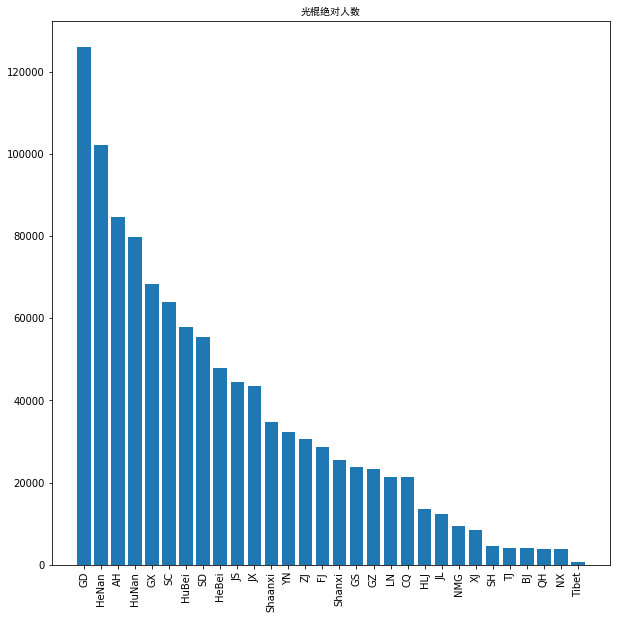

In [8]:
df_gaokao_temp = df_gaokao.sort_values(by='男女人数差', ascending=False)

plt.figure(figsize=(10,10))
plt.title('光棍绝对人数',fontproperties=myfont)
plt.bar(x=df_gaokao_temp['缩写'],height=df_gaokao_temp['男女人数差'])
plt.xticks(rotation='vertical')
plt.show()

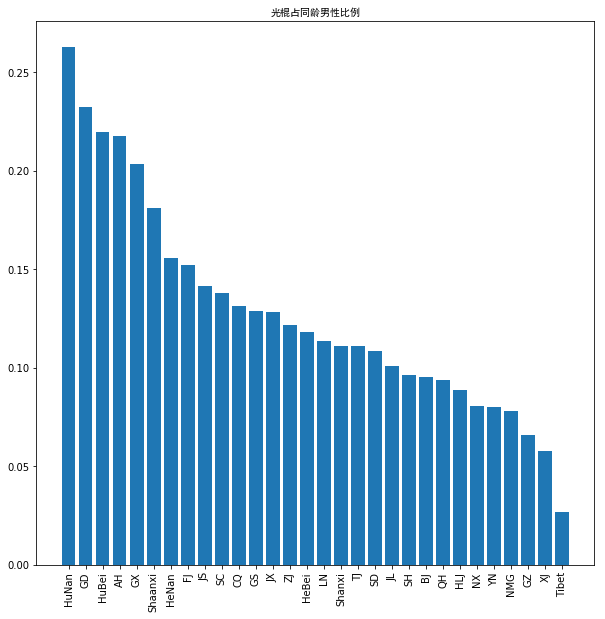

In [9]:
df_gaokao_temp = df_gaokao.sort_values(by='光棍占比', ascending=False)

plt.figure(figsize=(10,10))
plt.title('光棍占同龄男性比例',fontproperties=myfont)
plt.bar(x=df_gaokao_temp['缩写'],height=df_gaokao_temp['光棍占比'])
plt.xticks(rotation='vertical')
plt.show()

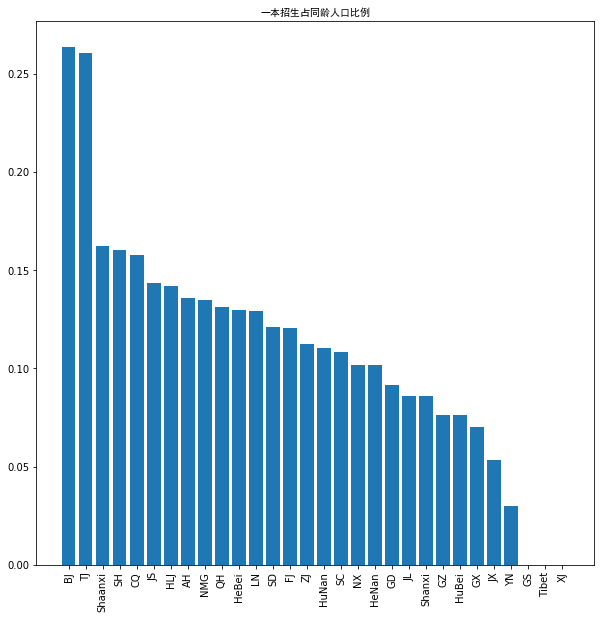

In [10]:
df_gaokao_temp = df_gaokao.sort_values(by='一本人口比', ascending=False)

plt.figure(figsize=(10,10))
plt.title('一本招生占同龄人口比例',fontproperties=myfont)
plt.bar(x=df_gaokao_temp['缩写'],height=df_gaokao_temp['一本人口比'])
plt.xticks(rotation='vertical')
plt.show()